In [1]:
import numpy as np                    # Loading libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading the dataset		
from google.colab import files		
files.upload()

Saving dwm_expt5_iris.csv to dwm_expt5_iris.csv


{'dwm_expt5_iris.csv': b'sepal_length,sepal_width,petal_length,petal_width\r\n5.1,3.5,1.4,0.2\r\n4.9,3,1.4,0.2\r\n4.7,3.2,1.3,0.2\r\n4.6,3.1,1.5,0.2\r\n5,3.6,1.4,0.2\r\n5.4,3.9,1.7,0.4\r\n4.6,3.4,1.4,0.3\r\n5,3.4,1.5,0.2\r\n4.4,2.9,1.4,0.2\r\n4.9,3.1,1.5,0.1\r\n5.4,3.7,1.5,0.2\r\n4.8,3.4,1.6,0.2\r\n4.8,3,1.4,0.1\r\n4.3,3,1.1,0.1\r\n5.8,4,1.2,0.2\r\n5.7,4.4,1.5,0.4\r\n5.4,3.9,1.3,0.4\r\n5.1,3.5,1.4,0.3\r\n5.7,3.8,1.7,0.3\r\n5.1,3.8,1.5,0.3\r\n5.4,3.4,1.7,0.2\r\n5.1,3.7,1.5,0.4\r\n4.6,3.6,1,0.2\r\n5.1,3.3,1.7,0.5\r\n4.8,3.4,1.9,0.2\r\n5,3,1.6,0.2\r\n5,3.4,1.6,0.4\r\n5.2,3.5,1.5,0.2\r\n5.2,3.4,1.4,0.2\r\n4.7,3.2,1.6,0.2\r\n4.8,3.1,1.6,0.2\r\n5.4,3.4,1.5,0.4\r\n5.2,4.1,1.5,0.1\r\n5.5,4.2,1.4,0.2\r\n4.9,3.1,1.5,0.1\r\n5,3.2,1.2,0.2\r\n5.5,3.5,1.3,0.2\r\n4.9,3.1,1.5,0.1\r\n4.4,3,1.3,0.2\r\n5.1,3.4,1.5,0.2\r\n5,3.5,1.3,0.3\r\n4.5,2.3,1.3,0.3\r\n4.4,3.2,1.3,0.2\r\n5,3.5,1.6,0.6\r\n5.1,3.8,1.9,0.4\r\n4.8,3,1.4,0.3\r\n5.1,3.8,1.6,0.2\r\n4.6,3.2,1.4,0.2\r\n5.3,3.7,1.5,0.2\r\n5,3.3,1.4,0.2\r\n7,3.

In [3]:
df = pd.read_csv('dwm_expt5_iris.csv', sep=',', delimiter=None)
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


Text(0, 0.5, 'Petal Width')

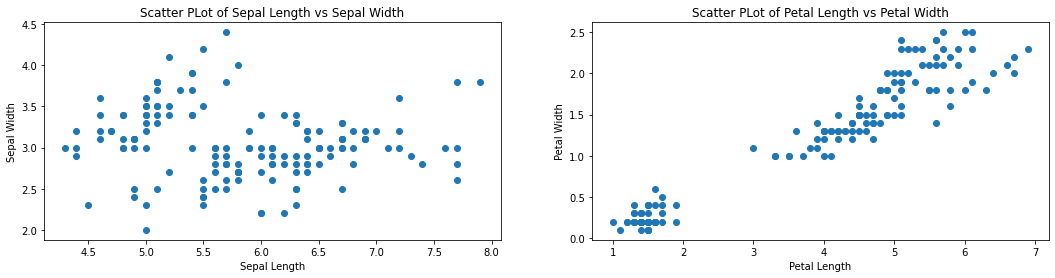

In [4]:
fig = plt.figure(figsize=(18,4))
ax1 = fig.add_subplot(121)
ax1.scatter(df['sepal_length'], df['sepal_width'])
plt.title('Scatter PLot of Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
ax2 = fig.add_subplot(122)
ax2.scatter(df['petal_length'], df['petal_width'])
plt.title('Scatter PLot of Petal Length vs Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [5]:
!pip install kneed
from kneed import KneeLocator
from sklearn.cluster import KMeans
sum_of_squares = []
k = range(1, 11)
for i in k:
  km = KMeans(n_clusters=i, init='k-means++', random_state=0)
  km.fit(df)
  sum_of_squares.append(km.inertia_)
y = sum_of_squares               # y[0]->x[0]
x = range(1, len(y)+1)
kn = KneeLocator(x, y, curve='convex', direction='decreasing')
no = kn.knee
no

3

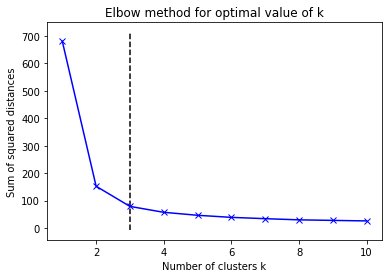

In [6]:
plt.plot(x, y, 'bx-')
plt.xlabel('Number of clusters k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method for optimal value of k')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=no, init='k-means++', max_iter=600, algorithm='auto')
kmeans = kmeans.fit_predict(df)
kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

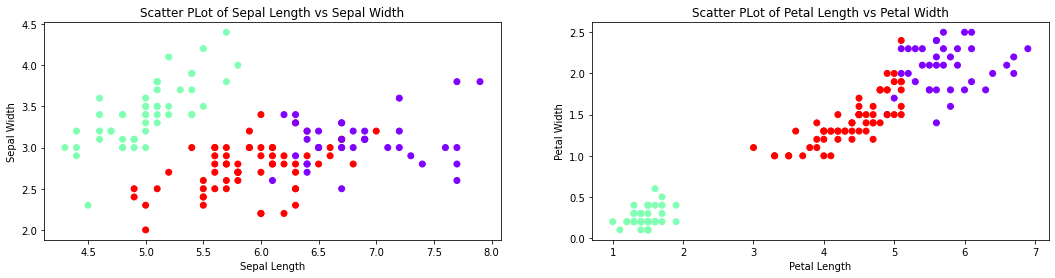

In [8]:
fig = plt.figure(figsize=(18,4))
ax1 = fig.add_subplot(121)
ax1.scatter(df['sepal_length'], df['sepal_width'], c=kmeans, cmap = 'rainbow')
plt.title('Scatter PLot of Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
ax2 = fig.add_subplot(122)
ax2.scatter(df['petal_length'], df['petal_width'], c=kmeans, cmap = 'rainbow')
plt.title('Scatter PLot of Petal Length vs Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()